In [ ]:
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [ ]:
# importing libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


In [42]:
# import some data to play with
df = pd.read_csv('Fraud_check.csv')

In [43]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [44]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [45]:
df.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [46]:
df[df['Taxable.Income']<=30000]


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [47]:
df2 = pd.cut(df['Taxable.Income'],bins=[10003,30000,99619],labels=['low','high'])

In [48]:
df2

0      high
1      high
2      high
3      high
4      high
       ... 
595    high
596    high
597    high
598    high
599    high
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['low' < 'high']

In [49]:
df['Taxable.Income']=df2
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,high,50047,10,YES
1,YES,Divorced,high,134075,18,YES
2,NO,Married,high,160205,30,YES
3,YES,Single,high,193264,15,YES
4,NO,Married,high,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,high,39492,7,YES
596,YES,Divorced,high,55369,2,YES
597,NO,Divorced,high,154058,0,YES
598,YES,Married,high,180083,17,NO


In [50]:
df['Taxable.Income']

0      high
1      high
2      high
3      high
4      high
       ... 
595    high
596    high
597    high
598    high
599    high
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['low' < 'high']

In [51]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,high,50047,10,YES
1,YES,Divorced,high,134075,18,YES
2,NO,Married,high,160205,30,YES
3,YES,Single,high,193264,15,YES
4,NO,Married,high,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,high,39492,7,YES
596,YES,Divorced,high,55369,2,YES
597,NO,Divorced,high,154058,0,YES
598,YES,Married,high,180083,17,NO


In [52]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

df['Taxable.Income']=label_encoder.fit_transform(df['Taxable.Income'])

In [53]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [54]:
#Complete df dataset
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])


In [55]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [56]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [57]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
x=pd.concat([df.iloc[:,0:2],df.iloc[:,3:6]],axis=1)
y=df['Taxable.Income']

In [60]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [61]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [62]:
df['Taxable.Income'].unique()

array([0, 1, 2])

In [63]:
df['Taxable.Income'].value_counts()

0    476
1    123
2      1
Name: Taxable.Income, dtype: int64

In [64]:
colnames = list(df.columns) 
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

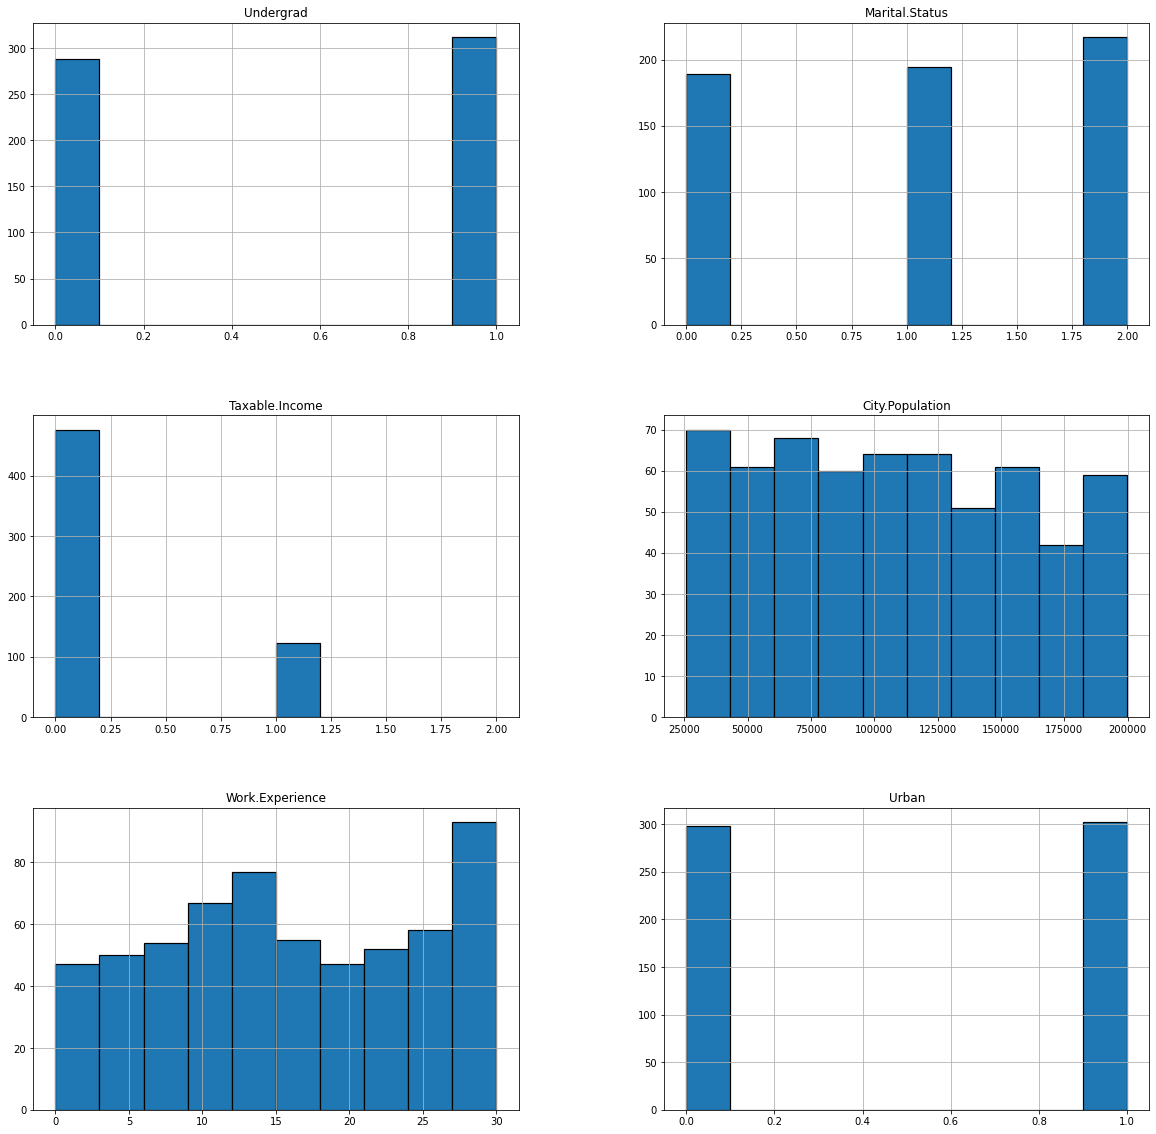

In [65]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

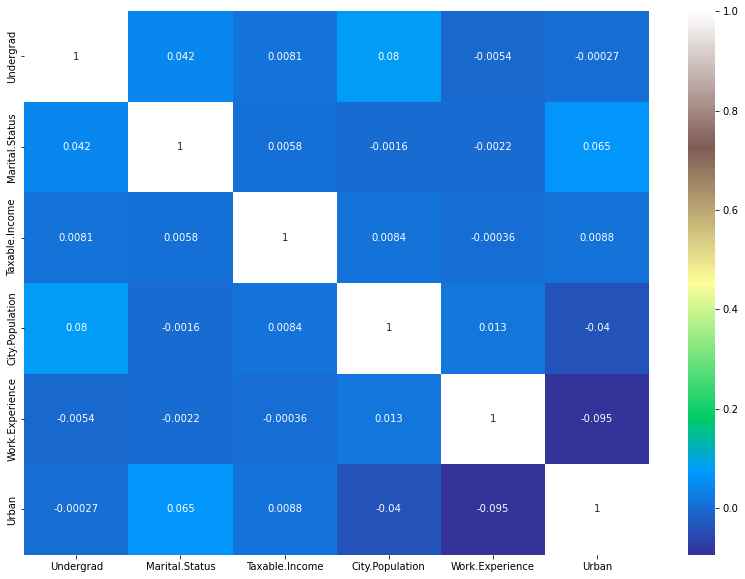

In [72]:
df.to_csv('auto.csv')
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')


In [66]:
kfold = KFold(n_splits=10,shuffle = True, random_state = 40)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=40)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.7433333333333334


In [67]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle= True ,random_state=42)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7449999999999999


In [68]:
num_trees = 100
kfold = KFold(n_splits=100, shuffle = True, random_state=42)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.7566666666666666
